<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Softmax Regression:-
- Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes.

In [25]:
#importing some libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [26]:
#loading a iris dataset:
iris=pd.read_csv("iris_data.csv")

In [27]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
37,38,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
#removing the Id column:
iris.drop("Id",axis=1,inplace=True)

In [37]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
#converting the Species column into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris["Species"]=le.fit_transform(iris["Species"])

In [63]:
le.classes_  #[0,1,2]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
iris["Species"].value_counts()

,count
Species,
0,50
1,50
2,50


In [41]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [42]:
#Suffling the dataframe:
iris=iris.sample(frac=1).reset_index(drop=True)

In [43]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.0,3.0,4.8,1.8,2
1,5.4,3.4,1.5,0.4,0
2,5.5,2.4,3.8,1.1,1
3,5.9,3.0,5.1,1.8,2
4,6.1,2.9,4.7,1.4,1


In [44]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.2,random_state=1)

In [45]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [49]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred=clf.predict(x_test)
print("accuracy_score : ",accuracy_score(y_test,y_pred))

accuracy_score :  1.0


In [56]:
pd.DataFrame(confusion_matrix(y_test,y_pred),index=["actual 0","actual 1","actual 2"],
             columns=["predicted 0","predicted 1","predicted 2"])

,predicted 0,predicted 1,predicted 2
actual 0,5,0,0
actual 1,0,12,0
actual 2,0,0,13


In [62]:
#prediction on a data:
query=np.array([[6.0,3.0,4.8,1.8]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00273069, 0.49699486, 0.50027445]])

In [64]:
pred=clf.predict(query)[0]
if pred==0:
  print("Iris-setosa")
elif pred==1:
  print("Iris-versicolor")
else:
  print("Iris-virginica")

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#visualization with 2 independent features:

In [75]:
iris_2=iris[["SepalLengthCm","PetalLengthCm","Species"]]

In [76]:
iris_2.head()

,SepalLengthCm,PetalLengthCm,Species
0,6.0,4.8,2
1,5.4,1.5,0
2,5.5,3.8,1
3,5.9,5.1,2
4,6.1,4.7,1


In [77]:
x_train,x_test,y_train,y_test=train_test_split(iris_2.iloc[:,:-1],iris_2.iloc[:,-1],test_size=0.2,random_state=1)

In [78]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_pred=clf.predict(x_test)
print("accuracy_score : ",accuracy_score(y_test,y_pred))

accuracy_score :  0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression')

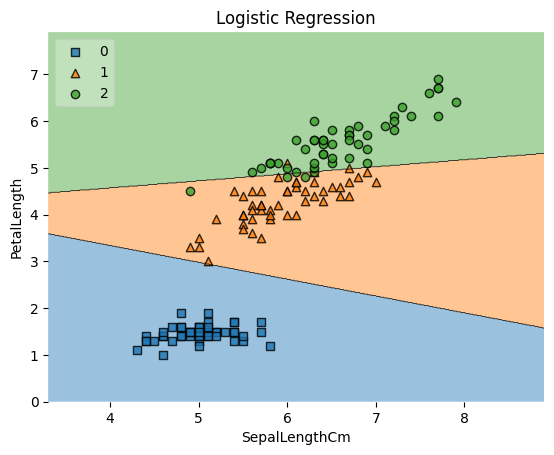

In [82]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(iris_2.iloc[:,:-1].values,iris_2.iloc[:,-1].values.ravel(),clf=clf,legend=2)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLength")
plt.title("Logistic Regression")